<a href="https://colab.research.google.com/github/jihanfarah/Titanic-Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Challenge: Titanic - Machine Learning from Disaster

## Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Steps
The steps in this project based on the DQLab project: `Basic Feature Discovering for Machine Learning`. There are few steps we will do to get the prediction:

1. Data preparation:
  * Importing library
  * Importing data
2. Data cleansing
3. Data exploring
4. Feature engineering
4. Data modeling





## Data Preparation
### Importing library

Before we start, we need to prepare the data. We need to import the library that we will use. We import some libraries such as:
- pandas for proceeding data frame and CSV
- matplotlib and seaborn for graph plotting
- sklearn for machine learning modeling
- string for string process


In [37]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Importing data

First, we will concatenate train and test dataframe using function. We define function `concat_df` with two parameters: train_data and test_data. 

We also import train.csv as `train_df` variable and test.csv as `test_df` variable. Then, we make list of two datasets as `dfs`.

We give name for each dataset such as:
- train_df as Training Dataset
- test_df as Testing Dataset
- all_df as All Dataset

In [38]:
def concat_df(train_data, test_data):
	return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

train_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic predict/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic predict/test.csv")
all_df = concat_df(train_df, test_df)
dfs = [train_df, test_df]
train_df.name = 'Training Dataset'
test_df.name = 'Test Dataset'
all_df.name = 'All Dataset'

Then, we print the preview of the data and the number of row and column for each dataset.

In [39]:
print("Training Dataset's shape:", train_df.shape)
print("\nTraining Dataset's informations:\n")
print(train_df.head())
print("Testing Dataset's shape:", test_df.shape)
print("\nTesting Dataset's informations:\n")
print(test_df.head())

Training Dataset's shape: (891, 12)

Training Dataset's informations:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  

Here are the explanation of each variable notes:
1. `PassengerId` is our unique ID. This column does not have any effect to our target.
2. `Survived` is our target/label column with the value 0 = Not Survived and 1 = Survived.
3. `Pclass` is a proxy for socio-economic status (SES), which are
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

4. `Name`, `Sex`, and `Age` are self-explanatory data.

5. `Sibsp` defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

6. `Parch` defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

7. `Ticket` is the ID for ticket
8. `Fare` is the ticket fare.
9. `Cabin` is number cabin of passenger.
10. `Embarked` is the code of departure port;
  - C= Cherbourg
  - Q = Queenstown
  - S = Southampton

We also see that we have 891 rows and 12 columns for training dataset, and 418 rows and 11 columns for testing dataset.

Next, we will check the missing value from training dataset. 

In [40]:
print("Training dataset's informations:\n")
train_df.info(memory_usage=False)
print("\n\nTesting dataset's informations:\n")
test_df.info(memory_usage=False)

Training dataset's informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

Testing dataset's informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

We get that from the training dataset the columns `Age`, `Cabin`, and `Embarked` have some missing values. From the testing dataset, the columns `Age`, `Fare`, and `Cabin` have some missing values. To ensure the total of missing values, we define the `display_missing` function.

In [41]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Dataset
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Dataset
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




## Data Cleansing

Before we fill the missing value, we need to find the correlation between variables. Here, we will use the training dataset. We only look for variables that have a correlation without looking at the type of correlation, so we use the absolute function.

In [42]:
print("Training dataset's variables' correlation:\n", train_df.corr().abs())

Training dataset's variables' correlation:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652   
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629   
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443   
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119   
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838   
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000   
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass       0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


We can see that survived passengers have a correlation with passenger class (Pclass) and fare. We also get that the age of the passengers has a correlation with passenger class, sibling spouse, and parent children. 

We can assume that the chances of survival are higher for high-class passengers and the older the passengers, the higher the chances of bringing children/siblings/spouse.

From that, we can fill the missing values in the `Age` column with the median based on gender and passenger class. We add the median based on gender and passenger class as `age_by_pclass_sex`.

In [43]:
age_by_pclass_sex = all_df.groupby(['Sex','Pclass']).median()['Age']

for pclass in range(1,4):
	for sex in ['female', 'male']:
		print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(all_df['Age'].median()))

#Filling the missing values in Age with the medians of Sex and Pclass groups
all_df['Age'] = all_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


We fill the missing value in `Embarked` with 'S' because most trips are from that port. Then, we fill the missing value in Fare with the median based on `Pclass`, `Parch`, and `SibSp`. 

In [44]:
#Filling the missing values in Embarked with S
all_df['Embarked'] = all_df['Embarked'].fillna('S')

med_fare = all_df.groupby(['Pclass','Parch','SibSp']).Fare.median()

#Filling the missing value in Fare with the median Fare
all_df['Fare'] = all_df.groupby(['Pclass','Parch','SibSp'])['Fare'].apply(lambda x: x.fillna(x.median()))

## Data Exploring

Then, we make visualization to find the relation between survived passenger with `Embarked`, `Parch`, `Pclass`, `Sex`, and `SibSp`.

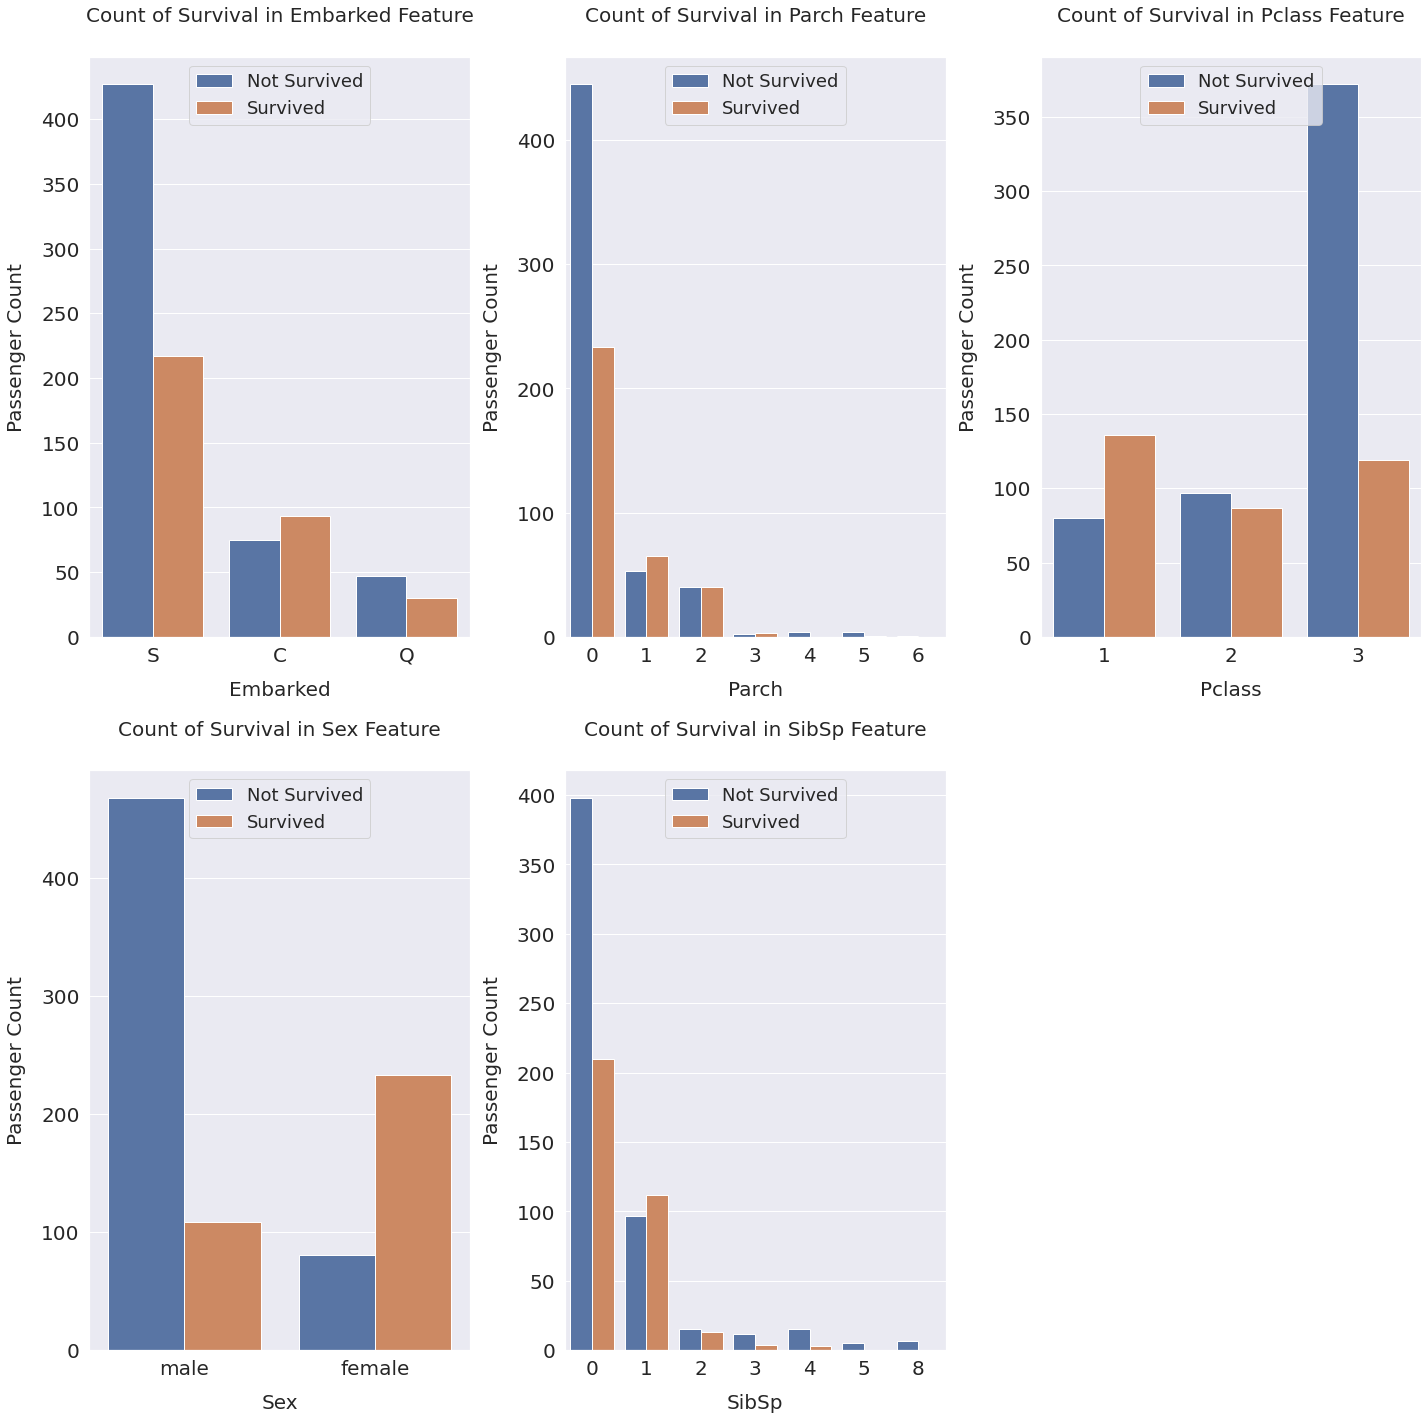

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
	plt.subplot(2,3,i)
	sns.countplot(x=feature, hue='Survived', data=train_df)
	
	plt.xlabel('{}'.format(feature), size=20, labelpad=15)
	plt.ylabel('Passenger Count', size=20, labelpad=15)
	plt.tick_params(axis='x', labelsize=20)
	plt.tick_params(axis='y', labelsize=20)
	
	plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size':18})
	plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()
plt.show()

From the graphic, we can see most of the survivors are from Southampton, bring no parents/children/siblings/spouse, take the first class, and are female. We can conclude that the higher the passenger's class, the chance to survive is higher too. Most of the survivor is doing the trip alone, so the chance to survive is higher for the people that alone.

Next, we make visualization to see the survival count based on `Fare` and `Age`. We will divide `Fare` into 10 categories and `Age` into 13 categories.

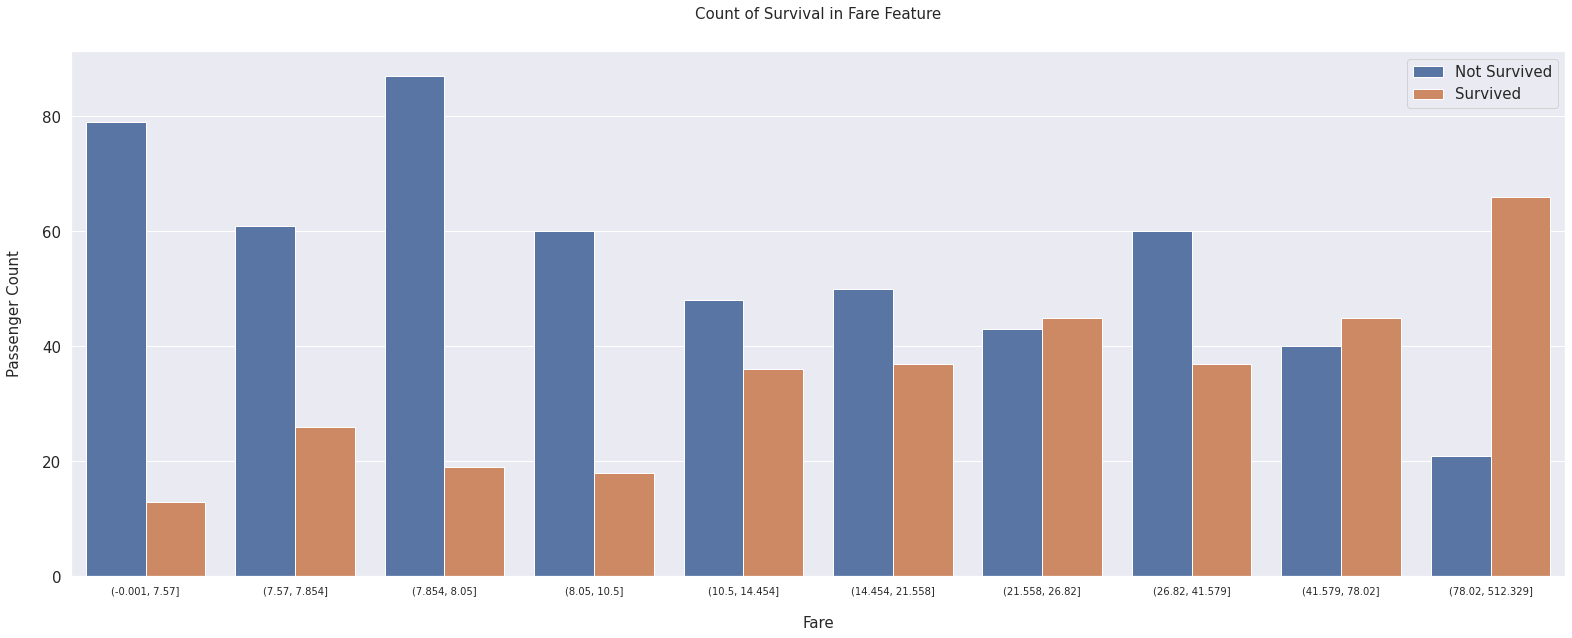

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_df = concat_df(train_df, test_df)

age_by_pclass_sex = all_df.groupby(['Sex', 'Pclass']).median()['Age']
all_df['Age'] = all_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
all_df['Embarked'] = all_df['Embarked'].fillna('S')
med_fare = all_df.groupby(['Pclass','Parch','SibSp']).Fare.median()
all_df['Fare'] = all_df.groupby(['Pclass','Parch','SibSp'])['Fare'].apply(lambda x: x.fillna(x.median()))

all_df['Fare'] = pd.qcut(all_df['Fare'], 10)

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Fare', hue='Survived', data=all_df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.tight_layout()
plt.show()


From the graphic, the fare category that has the lowest number of surviving passengers is 0-7.57, while the fare category that has the highest number of surviving passengers is 78.02-512.329. But, the fare from 21.558-26.82 and 41.579-78.02 also have a high number of surviving passengers.

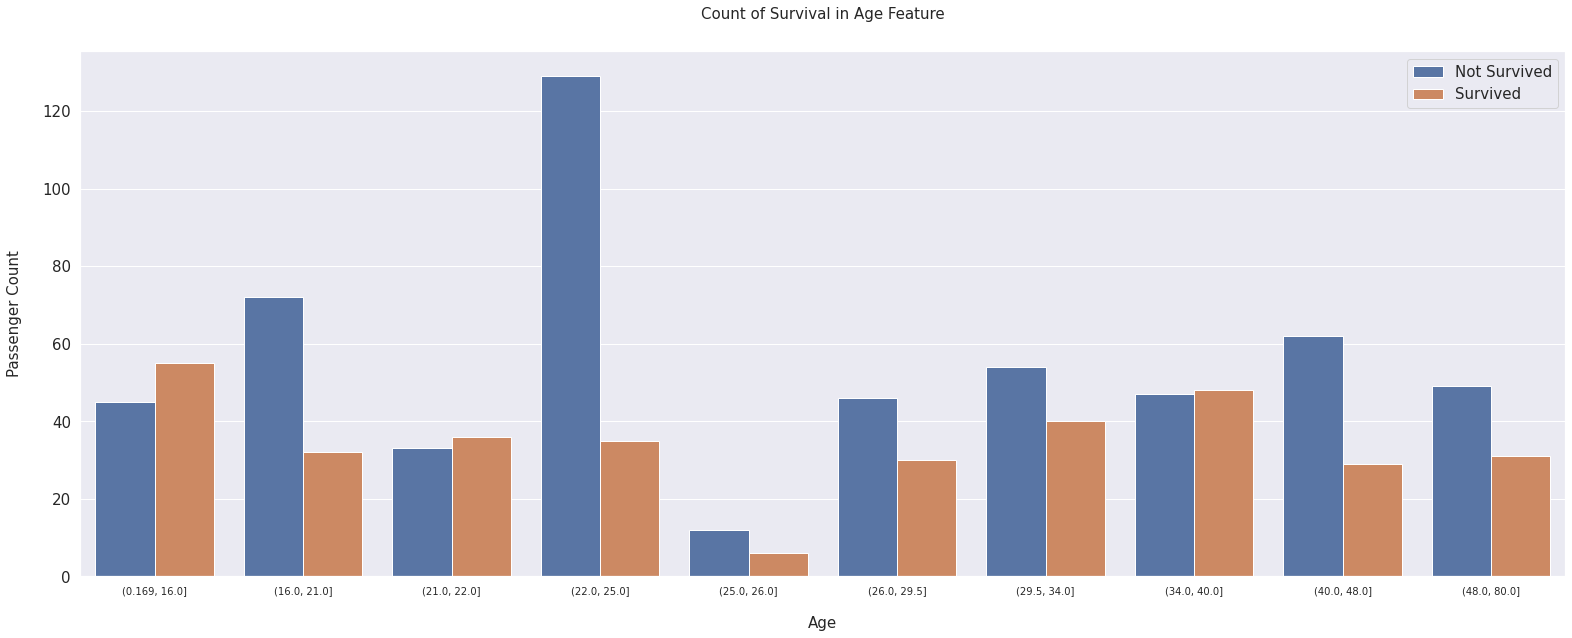

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_df = concat_df(train_df, test_df)

age_by_pclass_sex = all_df.groupby(['Sex', 'Pclass']).median()['Age']
all_df['Age'] = all_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
all_df['Embarked'] = all_df['Embarked'].fillna('S')
med_fare = all_df.groupby(['Pclass','Parch','SibSp']).Fare.median()
all_df['Fare'] = all_df.groupby(['Pclass','Parch','SibSp'])['Fare'].apply(lambda x: x.fillna(x.median()))

all_df['Age'] = pd.qcut(all_df['Age'], 10)

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Age', hue='Survived', data=all_df)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)
plt.tight_layout()
plt.show()


From the graphic, the age category that has the lowest number of surviving passengers is 25-26, while the age category that has the highest number of surviving passengers is 0-16. But, the age from 29.5-34 and 34-40 also have a high number of surviving passengers.

## Feature Engineering

Before we start to model the data, we will do feature engineering. Feature engineering is a process to make new features from the features that already exist. Feature engineering will help to improve the accuracy of the machine learning model.

First, we will make `Family_Size`. `Family_Size` is a combination of parent, children, sibling, and spouse. Then, we add 1 to count the passenger itself.


In [48]:
all_df['Family_Size'] = all_df['SibSp'] + all_df['Parch'] + 1

#Print distinct value of Family_Size
all_df['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

Then, we divide `Family_Size` into few categories. We define the categories as:
1. Family Size 1 = Alone
2. Family Size 2, 3, 4 = Small
3. Family Size 5, 6 = Medium
4. Family Size 7, 8, 11 = Large

In [49]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all_df['Family_Size_Grouped'] = all_df['Family_Size'].map(family_map)

Then, we make visualization from the new features to see the number of passenger and the survival count based on new features.

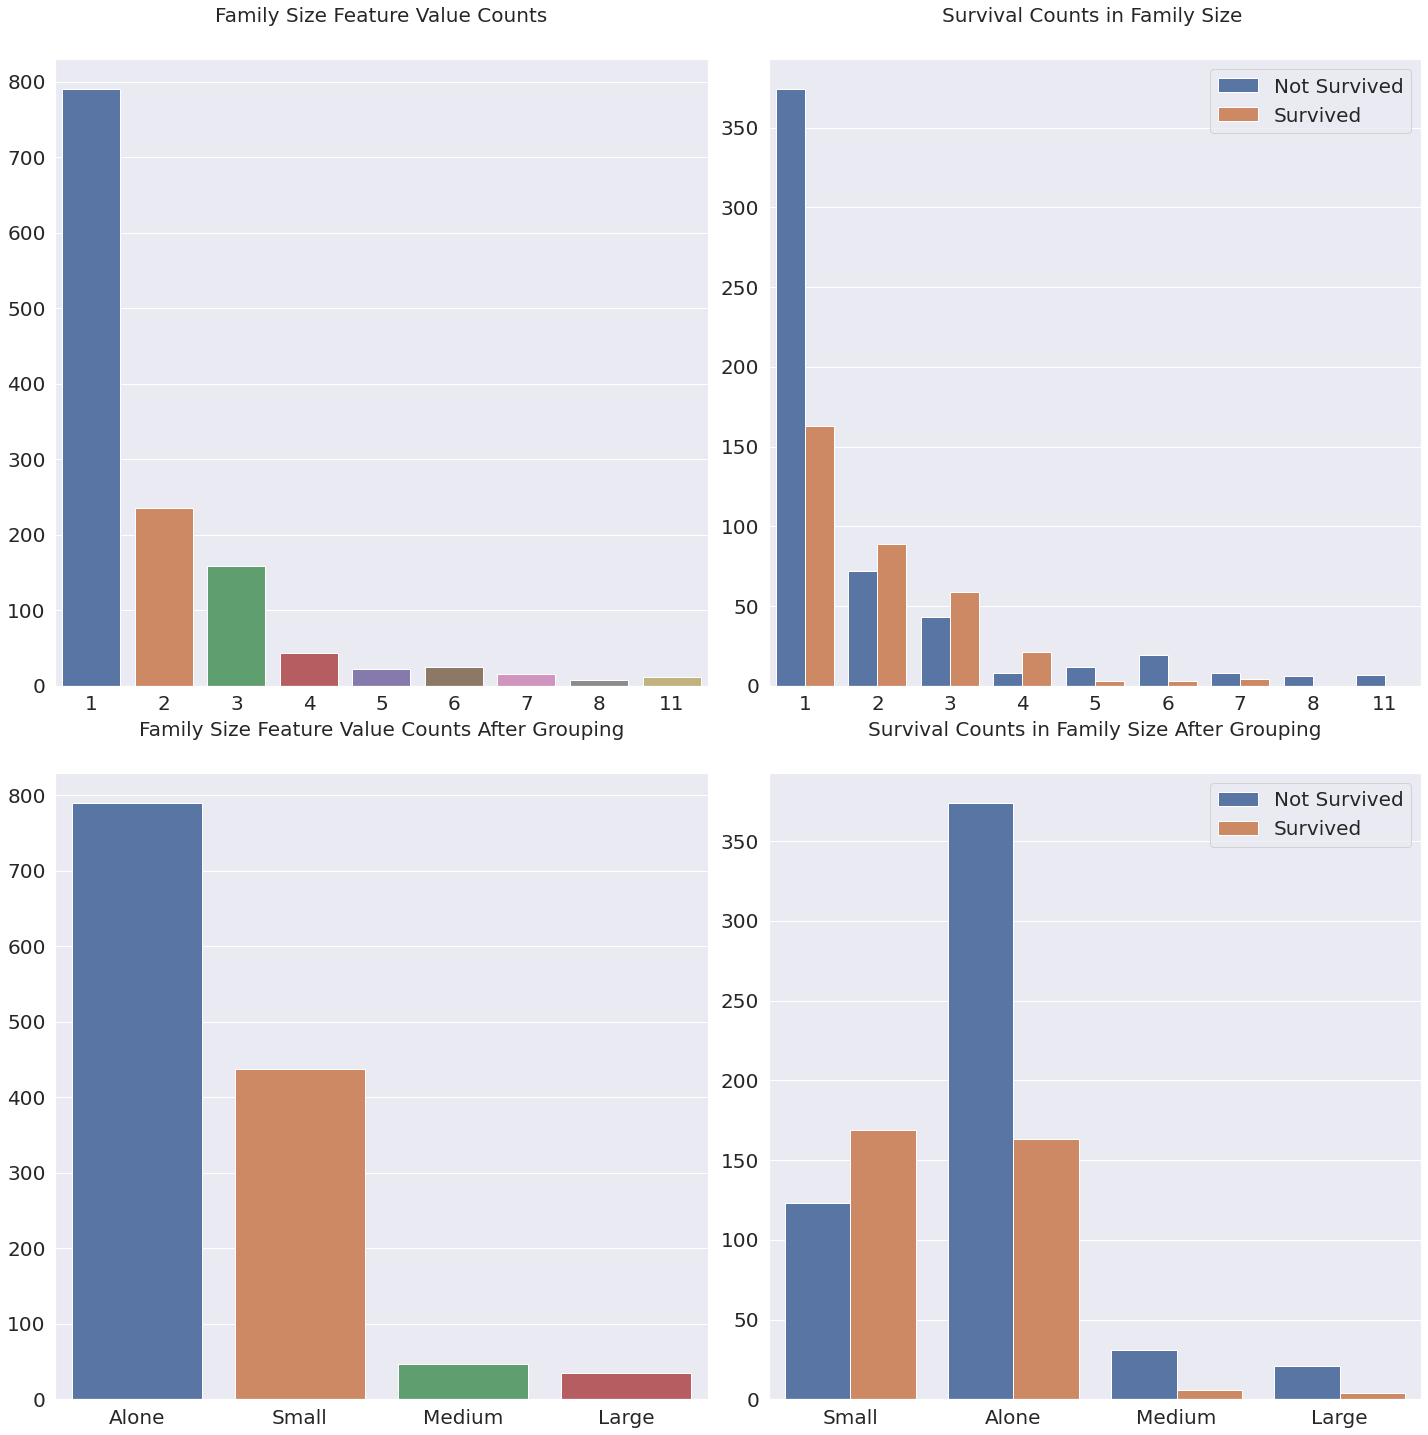

In [50]:
#Family Size before grouping
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_df['Family_Size'].value_counts().index, y=all_df['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_df, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

sns.barplot(x=all_df['Family_Size_Grouped'].value_counts().index, y=all_df['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_df, ax=axs[1][1])

#Family Size after grouping
axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.tight_layout()
plt.show()

The plot explains that people with Family_Size 2, 3, and 4 have a greater chance of surviving, while the rest of the probability decreases. Then, people who go with Family_Size_Grouped Small are more likely to have a greater level of safety.

Then, we create a new feature named `Ticket_Frequency` that shows the total of the passenger with the same ticket. 

In [51]:
all_df['Ticket_Frequency'] = all_df.groupby('Ticket')['Ticket'].transform('count')

We will make the visu


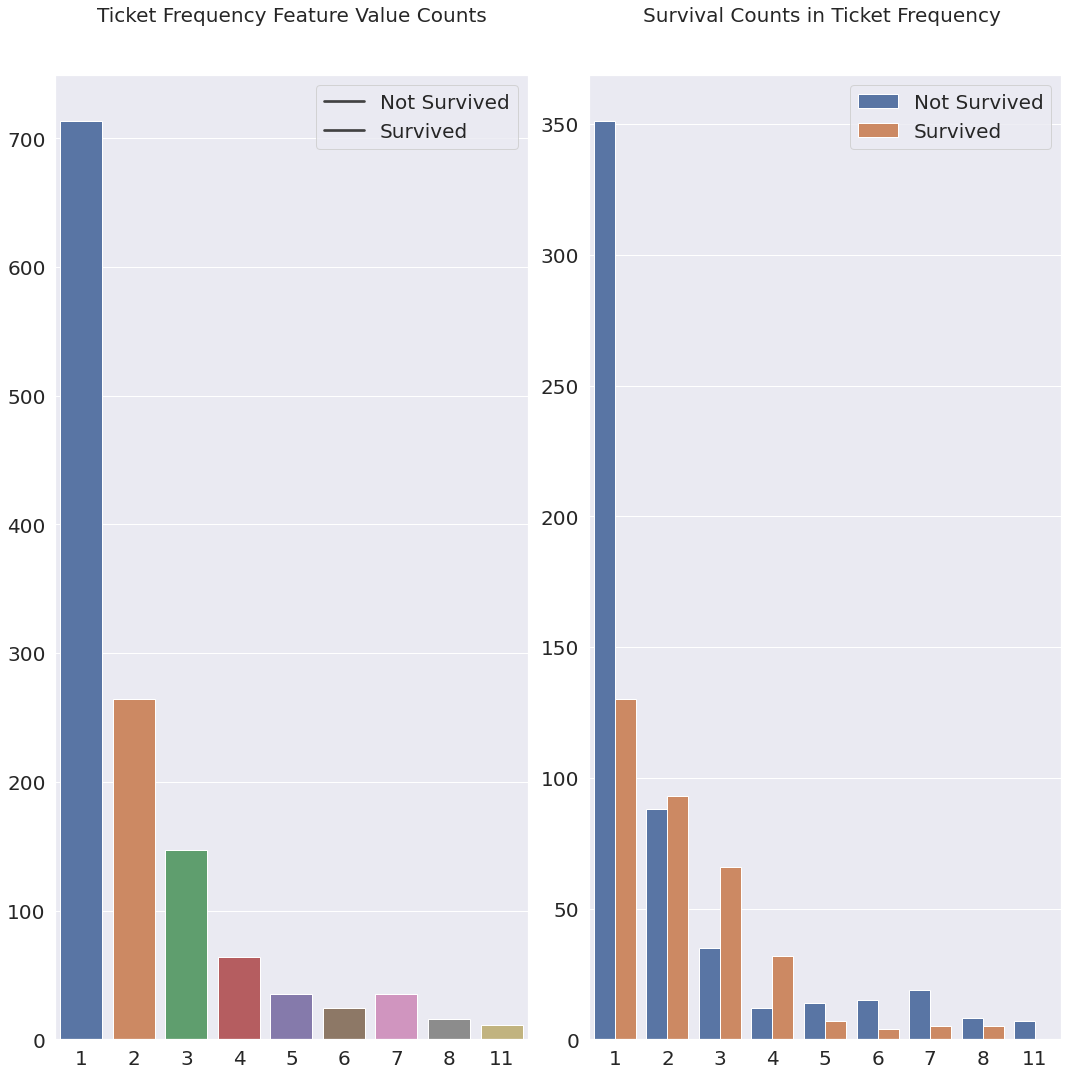

In [52]:
fig, axs = plt.subplots(figsize=(15, 15), ncols=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_df['Ticket_Frequency'].value_counts().index, y=all_df['Ticket_Frequency'].value_counts().values, ax=axs[0])
sns.countplot(x='Ticket_Frequency', hue='Survived', data=all_df, ax=axs[1])

axs[0].set_title('Ticket Frequency Feature Value Counts', size=20, y=1.05)
axs[1].set_title('Survival Counts in Ticket Frequency ', size=20, y=1.05)

for i in range(2):
    axs[i].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
plt.tight_layout()
plt.show()

The plot explains that people with Ticket_Frequency 2, 3, and 4 also have a greater chance of surviving, while the rest of the probability decreases. 

Next, we make a new feature named `Title` to define the passengers' titles. We will split the name to take the title of each passenger.

In [53]:
all_df['Title'] = all_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(all_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Commonly, the title used is Mr/Mrs/Miss. From the title, we can consider whether someone is married or not. So, we can make another feature named `Is_Married`. We write 0 for not married passengers and 1 for married passengers.

In [54]:
all_df['Is_Married'] = 0
all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We have many titles from the passengers, so we will group the title from 'Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', and 'Dona' into 'Miss/Mrs/Ms'. We also group 'Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', and 'Rev' into 'Dr/Military/Noble/Clergy'. Then, we can make the visualization of the total passengers based on title.

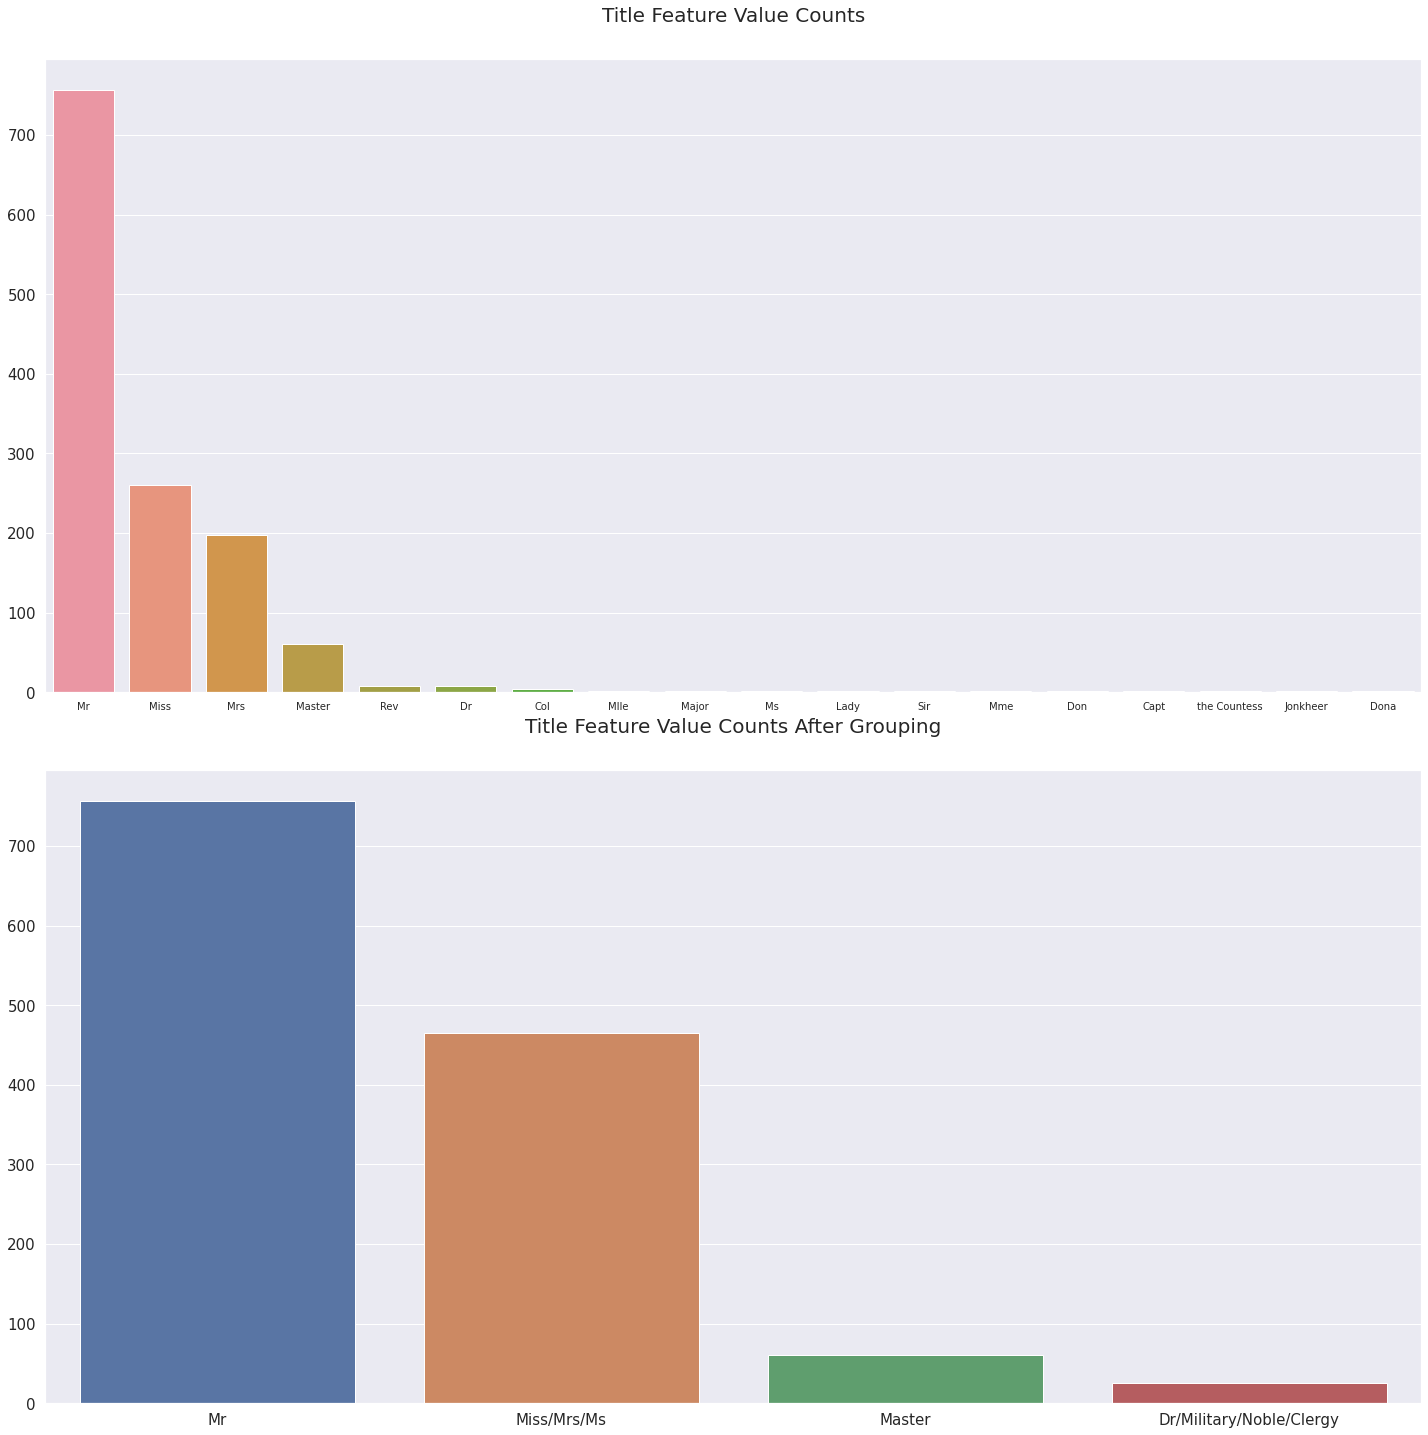

In [55]:
all_df['Title'] = all_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

all_df['Is_Married'] = 0
all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1

fig, axs = plt.subplots(nrows=2, figsize=(20,20))
sns.barplot(x=all_df['Title'].value_counts().index, y=all_df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
	axs[i].tick_params(axis='y', labelsize=15)
	
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

all_df['Title'] = all_df['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_df['Title'] = all_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all_df['Title'].value_counts().index, y=all_df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)
plt.tight_layout()
plt.show()

## Data Modeling

Before we start to make the model, we need to change the format of non-numeric features into numeric. We will use Label Encoder to encode the non-numerical features into integer.

In [56]:
train_df = all_df.loc[:890]
test_df = all_df.loc[891:]
dfs = [train_df, test_df]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Then, we change the format of categorical features into numeric. We will use One Hot Encoder to encode the categorical features.

In [57]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

train_df = pd.concat([train_df, *encoded_features[:5]], axis=1)
test_df = pd.concat([test_df, *encoded_features[5:]], axis=1)

Then, we drop the columns that we have encoded. 

In [58]:
all_df = concat_df(train_df, test_df)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 'Name', 'PassengerId', 'Pclass','Sex', 'Ticket', 'Title']

all_df.drop(columns=drop_cols, inplace=True)

print(all_df.head())

   Age  Embarked_1  Embarked_2  Embarked_3  Family_Size_Grouped_1  \
0    2         0.0         0.0         1.0                    0.0   
1    7         1.0         0.0         0.0                    0.0   
2    4         0.0         0.0         1.0                    1.0   
3    7         0.0         0.0         1.0                    0.0   
4    7         0.0         0.0         1.0                    1.0   

   Family_Size_Grouped_2  Family_Size_Grouped_3  Family_Size_Grouped_4  Fare  \
0                    0.0                    0.0                    1.0    18   
1                    0.0                    0.0                    1.0   207   
2                    0.0                    0.0                    0.0    41   
3                    0.0                    0.0                    1.0   189   
4                    0.0                    0.0                    0.0    43   

   Is_Married  ...  Pclass_2  Pclass_3  Sex_1  Sex_2  SibSp  Ticket_Frequency  \
0           0  ...     

Next, we set the features and target for training and testing. We use 

In [59]:
X_train = StandardScaler().fit_transform(train_df.drop(columns=drop_cols))
y_train = train_df['Survived'].values
X_test = StandardScaler().fit_transform(test_df.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


We will try two modelling method, such as Logistic Regression and Random Forest Classifier. Logistic regression is a data analysis technique that uses mathematics to find the relationship between two data factors. Then use this relationship to predict the value of one of these factors based on the other factors. Predictions usually have a finite number of outcomes, such as yes or no.

Meanwhile, Random Forest is an algorithm in machine learning that is used for classifying large data sets. One of the best algorithms in machine learning uses a decision tree or decision tree to carry out the selection process, where the tree or decision tree will be divided recursively based on data in the same class.


Training Accuracy with Logistic Regression : 0.8294051627384961
Prediction with Logistic Regression:
      Cabin  Embarked  Family_Size  Family_Size_Grouped  Survived  \
891   NaN         1            1                    0       0.0   
892   NaN         2            2                    3       0.0   
893   NaN         1            1                    0       0.0   
894   NaN         2            1                    0       0.0   
895   NaN         2            3                    3       1.0   

                                             Name  PassengerId  Pclass  Sex  \
891                              Kelly, Mr. James          892       3    1   
892              Wilkes, Mrs. James (Ellen Needs)          893       3    0   
893                     Myles, Mr. Thomas Francis          894       2    1   
894                              Wirz, Mr. Albert          895       3    1   
895  Hirvonen, Mrs. Alexander (Helga E Lindqvist)          896       3    0   

      Ticket  Title

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.05, 'Count of Survival with Logistic Regression')

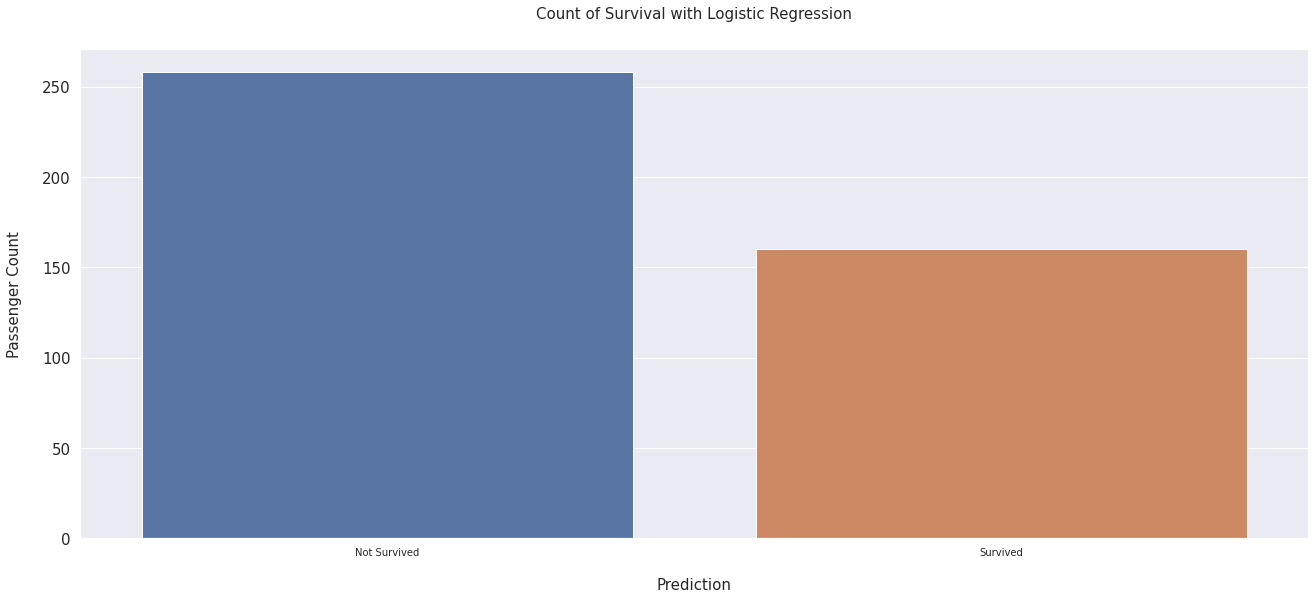

In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

print('Training Accuracy with Logistic Regression :', logreg.score(X_train,y_train))

test_df = test_df[drop_cols]
test_df['Survived'] = logreg.predict(X_test)
print("Prediction with Logistic Regression:\n ", test_df.head())

survived_map = {1.00: 'Survived', 0.00: 'Not Survived'}
test_df['Survived Note'] = test_df['Survived'].map(survived_map)

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Survived Note', data=test_df)
plt.xlabel('Prediction', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.title('Count of Survival with Logistic Regression', size=15, y=1.05)

Training Accuracy with Random Forest Classifier : 0.8361391694725028
Prediction with Random Forest Classifier:
      Cabin  Embarked  Family_Size  Family_Size_Grouped  Survived  \
891   NaN         1            1                    0       0.0   
892   NaN         2            2                    3       1.0   
893   NaN         1            1                    0       0.0   
894   NaN         2            1                    0       0.0   
895   NaN         2            3                    3       1.0   

                                             Name  PassengerId  Pclass  Sex  \
891                              Kelly, Mr. James          892       3    1   
892              Wilkes, Mrs. James (Ellen Needs)          893       3    0   
893                     Myles, Mr. Thomas Francis          894       2    1   
894                              Wirz, Mr. Albert          895       3    1   
895  Hirvonen, Mrs. Alexander (Helga E Lindqvist)          896       3    0   

      Tic

Text(0.5, 1.05, 'Count of Survival with Random Forest Classifier')

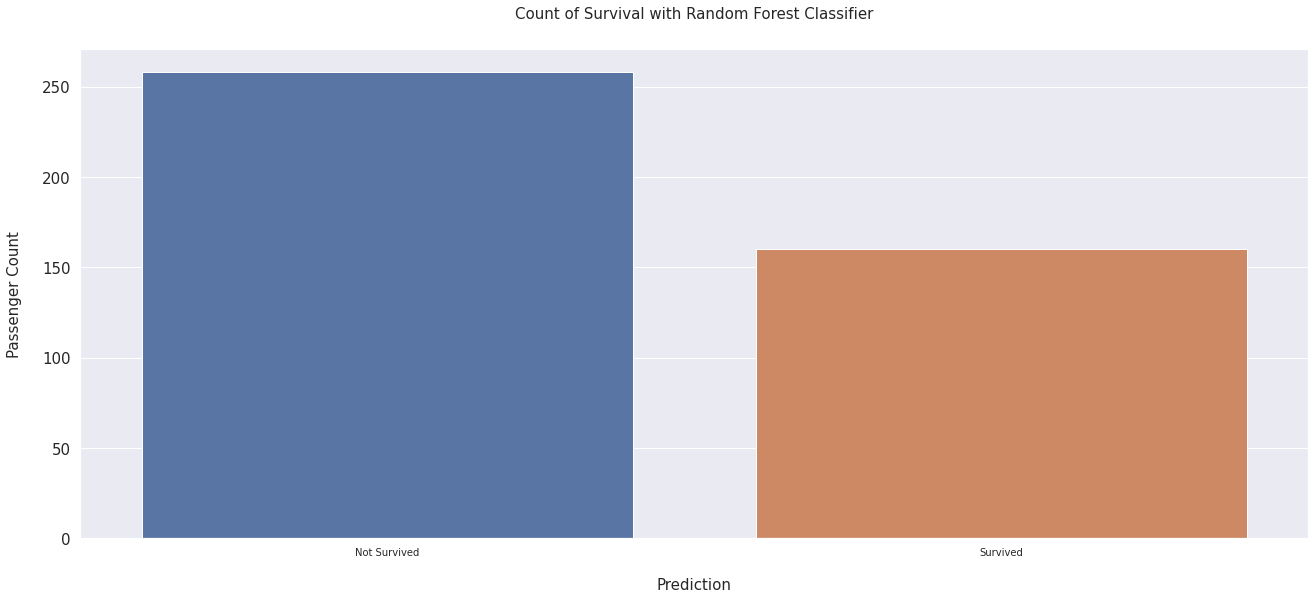

In [80]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

print('Training Accuracy with Random Forest Classifier :', random_forest.score(X_train,y_train))

test_df = test_df[drop_cols]
test_df['Survived'] = random_forest.predict(X_test)
print("Prediction with Random Forest Classifier:\n ", test_df.head())

survived_map = {1.00: 'Survived', 0.00: 'Not Survived'}
test_df['Survived Note'] = test_df['Survived'].map(survived_map)

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Survived Note', data=test_df)
plt.xlabel('Prediction', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.title('Count of Survival with Random Forest Classifier', size=15, y=1.05)

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.86516854 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8327715355805243
Standard Deviation: 0.03604127069930158
